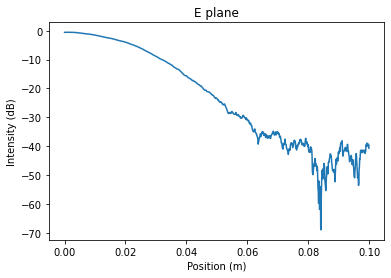

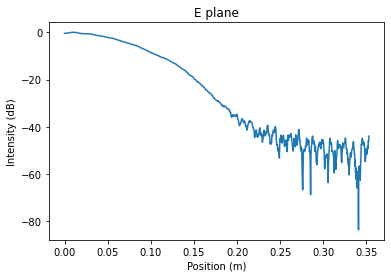

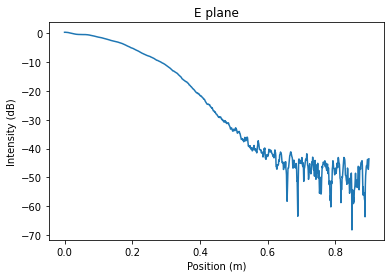

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

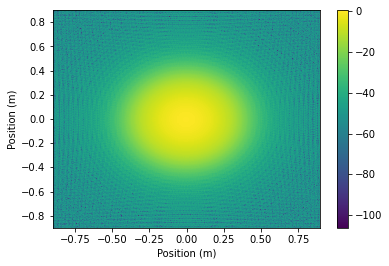

In [1]:
# From lens to primary...
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

# effective focal lengths of tertiary, secondary, primary
f_1 = 155 * u.cm
f_2 = 11940 * u.cm
f_3 = 19.2 * u.cm
tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
secondary_obj = poppy.QuadraticLens(f_lens=f_2)
primary_obj = poppy.QuadraticLens(f_lens=f_1)

# separations 
d_lens_3 = 33.06 * u.cm
d_3_2 = 86.562 * u.cm
d_2_1 = 104.995 * u.cm
d_IF = 19.2 * u.cm

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 100 * u.GHz #ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]
widths=[0.5*u.cm] #, 1*u.cm, 2*u.cm, 3*u.cm]

for it in np.arange(1,4):    
    plt.figure(it)  
    plt.title("E plane")
    plt.xlabel("Position (m)")
    plt.ylabel("Intensity (dB)")
    
for width in widths: # not actually looping, but saving loop if I want it later
    ll = const.c/ff

    wf = poppy.FresnelWavefront(beam_radius=5*u.cm, wavelength=ll)

    tertiary_obj = poppy.QuadraticLens(f_lens=f_3)
    secondary_obj = poppy.QuadraticLens(f_lens=f_2)
    primary_obj = poppy.QuadraticLens(f_lens=f_1)
    
    lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
    wf *= lenslet_aperture

    ring = poppy.CircularAperture(radius=0.05*u.m)
    wf *= ring # cold stop

    wf.propagate_fresnel(d_lens_3) # propogate to center of tertiary

    wf *= tertiary_obj
    
    y, x = wf.coordinates()
    plt.figure(1)
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=str(width))
    
    wf.propagate_fresnel(d_3_2) # propogate from tertiary to secondary
    
    wf *= secondary_obj
    
    y, x = wf.coordinates()
    plt.figure(2)
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=str(width))
    
    wf.propagate_fresnel(d_2_1) # propogate from secondary to primary
               
    y, x = wf.coordinates()
    plt.figure(3)
    plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]),label=str(width))

for it in np.arange(1,4):    
    plt.figure(it)
    plt.show()
    plt.clf()

a=0 # Toggles zoom
b=2048-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],10*np.log10(wf.intensity[a:b,a:b]))
fig.colorbar(c,ax=ax)
plt.xlabel('Position (m)')
plt.ylabel('Position (m)')
plt.show()